# AGUACATES

## ¿Qué tamaño de aguacate es el más popular?
Los aguacates son cada vez más populares y deliciosos en guacamole y en tostadas. La Junta de Aguacate Hass realiza un seguimiento de la oferta y la demanda de aguacate en los Estados Unidos, incluidas las ventas de tres tamaños diferentes de aguacate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

avocados = pd.read_csv('avocados.csv')

In [2]:
# Look at the first few rows of data
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


In [2]:
print(avocados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1014 non-null   object 
 1   type       1014 non-null   object 
 2   year       1014 non-null   int64  
 3   avg_price  1014 non-null   float64
 4   size       1014 non-null   object 
 5   nb_sold    1014 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.7+ KB
None


In [3]:
# Convert the 'date' column to datetime
avocados['date'] = pd.to_datetime(avocados['date'])

In [4]:
print(avocados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1014 non-null   datetime64[ns]
 1   type       1014 non-null   object        
 2   year       1014 non-null   int64         
 3   avg_price  1014 non-null   float64       
 4   size       1014 non-null   object        
 5   nb_sold    1014 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 47.7+ KB
None


In [3]:
# Get the total number of avocados sold of each size
# Agrupamos los datos por tamaño de aguacate y calculamos la suma del número vendido para cada tamaño.
nb_sold_by_size = avocados.groupby('size')["nb_sold"].sum()

print(nb_sold_by_size)

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64


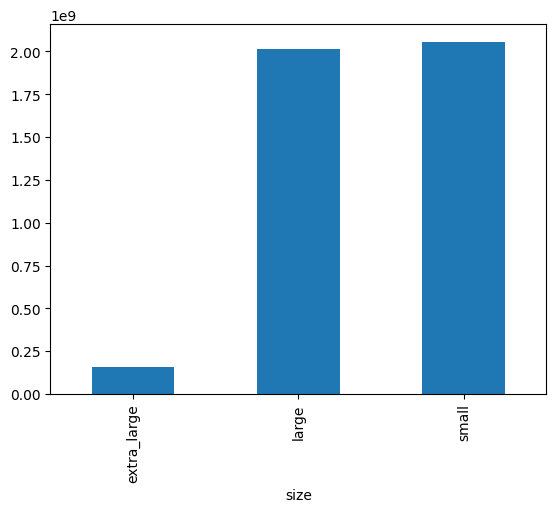

In [4]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

## Cambios en las ventas a lo largo del tiempo
Los gráficos de líneas están diseñados para visualizar la relación entre dos variables numéricas, donde cada valor de datos está conectado al siguiente. Son especialmente útiles para visualizar el cambio en un número a lo largo del tiempo, ya que cada punto de tiempo está conectado naturalmente al siguiente punto de tiempo. 
Visualizaremos el cambio en las ventas de aguacate en tres años.

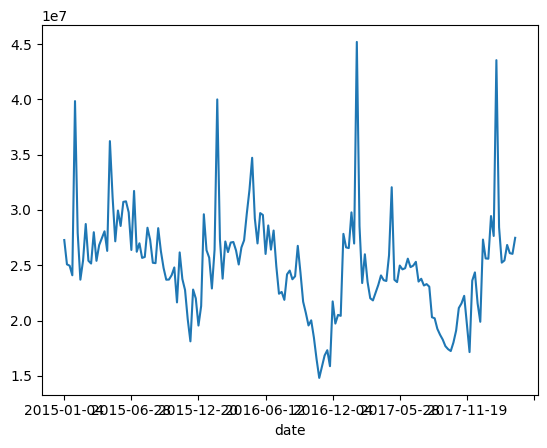

In [8]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

## Oferta y demanda de aguacate
Los diagramas de dispersión son ideales para visualizar relaciones entre variables numéricas. 
Compararemos la cantidad de aguacates vendidos con el precio promedio y veremos si están relacionados. Si están relacionados, es posible que pueda usar un número para predecir el otro.

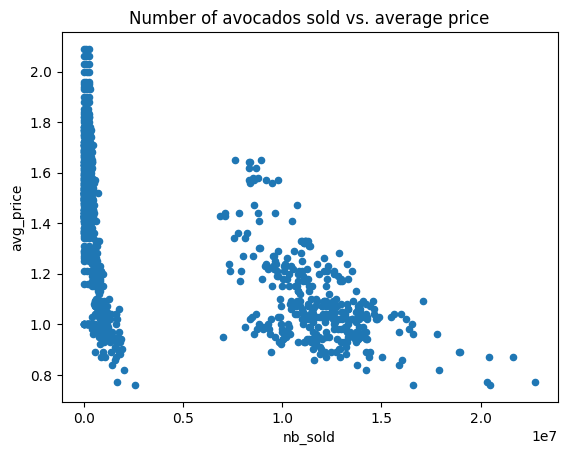

In [10]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(kind='scatter', x='nb_sold', y='avg_price', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

## Precio de los aguacates convencionales vs. orgánicos
La creación de múltiples gráficos para diferentes subconjuntos de datos nos permite comparar grupos. Crearemos múltiples histogramas para comparar los precios de los aguacates convencionales y orgánicos.

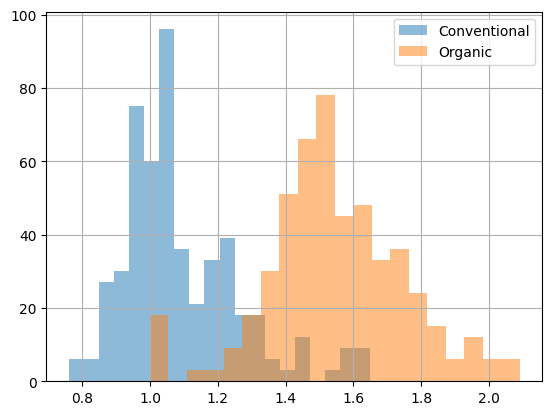

In [3]:
# Histogram of conventional avg_price 
avocados[avocados['type'] == 'conventional']['avg_price'].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['avg_price'].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(['Conventional', 'Organic'])

# Show the plot
plt.show()

## Encontrar valores faltantes
Los valores faltantes están en todas partes, y no queremos que interfieran con nuestro trabajo. Algunas funciones ignoran los datos que faltan de forma predeterminada, pero ese no es siempre el comportamiento que podríamos desear. 
Algunas funciones no pueden manejar los valores que faltan en absoluto, por lo que estos valores deben tenerse en cuenta antes de poder usarlos. Si no sabemos dónde están estos valores faltantes, o si existen, podríamos cometer errores en el análisis. 
Determinaremos si faltan valores en el conjunto de datos y, de ser así, cuántos.

Usaremos otro ejemplo, un subconjunto de que contiene solo ventas de 2016

In [2]:
avocados_2016 = pd.read_csv('avocados_2016.csv')
print(avocados_2016)

          date  avg_price   total_sold   small_sold   large_sold     xl_sold  \
0   2016-12-25       1.00  30287853.70   9255125.20  10282925.61   541972.42   
1   2016-12-18       0.96  29583882.61   9394065.91  10339168.20   427872.42   
2   2016-12-11       0.98  30093540.70   9009996.11          NaN   403047.93   
3   2016-12-04       1.00  31621221.90  11043350.90   9908982.97   428009.84   
4   2016-11-27       1.21  22923062.65   7891487.94   7337341.77         NaN   
5   2016-11-20       1.27  24989702.75          NaN   8033510.82   407567.78   
6   2016-11-13       1.36  24075126.49   8235135.43   7759608.21   477520.95   
7   2016-11-06       1.44  22534698.38   7804252.91          NaN   505349.44   
8   2016-10-30       1.43  21009730.21   7100458.82   6852046.35   453145.26   
9   2016-10-23       1.34  24753513.95   7579629.06   8104522.26   452383.96   
10  2016-10-16       1.30  27707046.82   8810664.45          NaN   447291.48   
11  2016-10-09       1.27  28857581.98  

In [11]:
# Check individual values for missing values
print(avocados_2016.isna())

     date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0   False      False       False       False       False    False   
1   False      False       False       False       False    False   
2   False      False       False       False        True    False   
3   False      False       False       False       False    False   
4   False      False       False       False       False     True   
5   False      False       False        True       False    False   
6   False      False       False       False       False    False   
7   False      False       False       False        True    False   
8   False      False       False       False       False    False   
9   False      False       False       False       False    False   
10  False      False       False       False        True    False   
11  False      False       False       False       False    False   
12  False      False       False       False       False    False   
13  False      False       False  

In [12]:
# Check each column for missing values
print(avocados_2016.isna().any())

date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


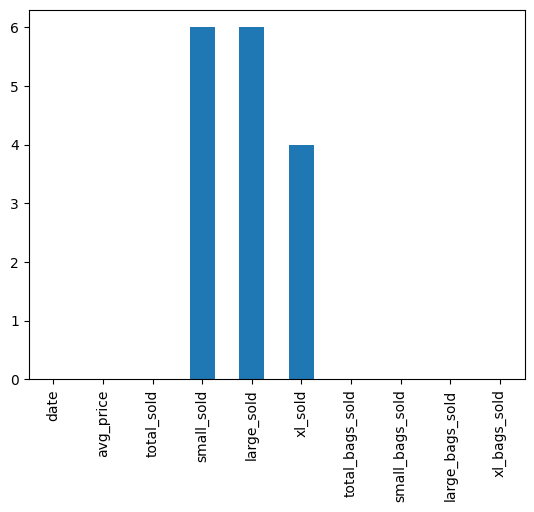

In [13]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

## Eliminación de valores que faltan
Ahora que sabemos que faltan algunos valores en el DataFrame, tenemos algunas opciones para tratarlos. Una forma es eliminarlos del conjunto de datos por completo. En este caso, lo haremos quitando todas las filas que contengan valores que faltan.

In [6]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool
